In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv('./Dataset/rating_reviews.csv')

In [3]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
data.shape

(20491, 2)

In [5]:
data.size

40982

In [6]:
data.columns

Index(['Review', 'Rating'], dtype='object')

In [7]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [8]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [9]:
data['Review'] = data['Review'].str.replace("[^a-zA-Z#]"," ")

In [10]:
tokenized_reviews = data['Review'].apply(lambda x: x.split())
tokenized_reviews.head()

0    [nice, hotel, expensive, parking, got, good, d...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, rooms, not, experience, hotel, monaco, ...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

In [11]:
tokenized_reviews.tail()

20486    [best, kept, secret, rd, time, staying, charm,...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, just, looks, nice, modern, outside, desk,...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, n, t, believe, excellent...
Name: Review, dtype: object

In [12]:
import nltk
from nltk import PorterStemmer
ps=PorterStemmer()
tokenized_reviews=tokenized_reviews.apply(lambda x:[ps.stem(word) for word in x])
tokenized_reviews.head()

0    [nice, hotel, expens, park, got, good, deal, s...
1    [ok, noth, special, charg, diamond, member, hi...
2    [nice, room, not, experi, hotel, monaco, seatt...
3    [uniqu, great, stay, wonder, time, hotel, mona...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

In [13]:
for i in range(len(tokenized_reviews)):
    tokenized_reviews[i]=' '.join(tokenized_reviews[i])
    data['Tokenized Review']=tokenized_reviews
data.head()

,Review,Rating,Tokenized Review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,unique great stay wonderful time hotel monac...,5,uniqu great stay wonder time hotel monaco loca...
4,great stay great stay went seahawk game aweso...,5,great stay great stay went seahawk game awesom...


In [14]:
data.tail()

,Review,Rating,Tokenized Review
20486,best kept secret rd time staying charm not ...,5,best kept secret rd time stay charm not star c...
20487,great location price view hotel great quick pl...,4,great locat price view hotel great quick place...
20488,ok just looks nice modern outside desk staff ...,2,ok just look nice modern outsid desk staff n t...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruin vacat hotel open sept guest w...
20490,people talking ca n t believe excellent ratin...,2,peopl talk ca n t believ excel rate hotel just...


# FEATURE EXTRACTION

# Using Count Vectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count_vector_bow=CountVectorizer(max_features=6000,stop_words='english',ngram_range=(1,4))
x_bow = count_vector_bow.fit_transform(data['Tokenized Review']).toarray()

In [17]:
x_bow.shape

(20491, 6000)

In [18]:
y_bow=data['Rating']

In [19]:
y_bow.shape

(20491,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train_bow,x_test_bow,y_train_bow,y_test_bow=train_test_split(x_bow,y_bow,test_size=0.3,random_state=7)

In [22]:
count_vector_bow.get_feature_names()

['aaa',
 'abl',
 'abl check',
 'abl use',
 'abl walk',
 'absolut',
 'absolut beauti',
 'absolut gorgeou',
 'absolut love',
 'absolut wonder',
 'abund',
 'ac',
 'accademia',
 'accept',
 'access',
 'access internet',
 'access room',
 'accid',
 'accommod',
 'accomod',
 'accompani',
 'accord',
 'account',
 'accur',
 'acknowledg',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'ad bonu',
 'adagio',
 'add',
 'addit',
 'address',
 'adequ',
 'adjac',
 'adjoin',
 'adjoin room',
 'adjust',
 'admit',
 'adult',
 'adult children',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advisor review',
 'aerob',
 'affect',
 'affinia',
 'affinia dumont',
 'afford',
 'afraid',
 'afternoon',
 'afternoon tea',
 'age',
 'agenc',
 'agent',
 'aggress',
 'ago',
 'agre',
 'agre review',
 'ahead',
 'ahead time',
 'air',
 'air condit',
 'air condit room',
 'air condit work',
 'air condition',
 'aircon',
 'aircondit',
 'airi',
 'airlin',
 'airport',
 'airport bu',
 'airport hotel',

In [23]:
count_vector_bow.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
dataframe_count=pd.DataFrame(x_bow,columns=count_vector_bow.get_feature_names())

In [25]:
dataframe_count.head()

,aaa,abl,abl check,abl use,abl walk,absolut,absolut beauti,absolut gorgeou,absolut love,absolut wonder,...,young,young children,younger,yr,yr old,yummi,yunqu,zero,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using TFIDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(max_features=8000,stop_words='english',ngram_range=(1,4))

In [27]:
import pickle
x_tfidf = tfidf_vector.fit_transform(data['Tokenized Review'])
pickle.dump(tfidf_vector,open("transform.pkl","wb"))

In [28]:
y_tfidf=data['Rating']

In [29]:
y_tfidf

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
xtrain_tfidf,xtest_tfidf,ytrain_tfidf,ytest_tfidf = train_test_split(x_tfidf,y_tfidf,test_size=0.3,random_state=3)

In [31]:
xtrain_tfidf

<14343x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 1326226 stored elements in Compressed Sparse Row format>

In [32]:
xtrain_tfidf.shape

(14343, 8000)

In [33]:
ytrain_tfidf.shape

(14343,)

# DATA VISUALIZATION

# Plotting Bar Plot for positive words

In [34]:
data.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

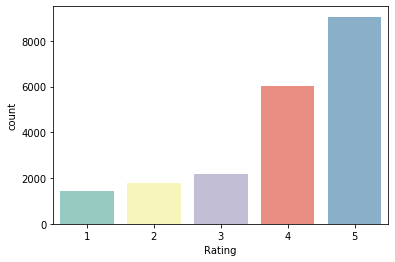

In [35]:
sns.countplot(data=data,x='Rating', palette="Set3")

In [36]:
from wordcloud import WordCloud
def wordCloud_generator(data):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show() 
    
wordCloud_generator(data['Review'])

ModuleNotFoundError: No module named 'wordcloud'

# BUILDING MODEL

# By using Count Vectorizer

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [38]:
nb.fit(x_train_bow,y_train_bow)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_test_pred_bow = nb.predict(x_test_bow)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
nb_bow_accuracy = accuracy_score(y_test_bow,y_test_pred_bow)
nb_bow_accuracy*100

40.92387768379961

In [43]:
print(confusion_matrix(y_test_bow,y_test_pred_bow))

[[ 248  134   33   11    5]
 [ 206  230   90   40   11]
 [ 126  222  163   96   42]
 [ 179  391  274  421  502]
 [ 279  432  161  398 1454]]


In [44]:
print(classification_report(y_test_bow,y_test_pred_bow))

              precision    recall  f1-score   support

           1       0.24      0.58      0.34       431
           2       0.16      0.40      0.23       577
           3       0.23      0.25      0.24       649
           4       0.44      0.24      0.31      1767
           5       0.72      0.53      0.61      2724

    accuracy                           0.41      6148
   macro avg       0.36      0.40      0.35      6148
weighted avg       0.50      0.41      0.43      6148



# USING LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression(random_state=12)

In [58]:
lr.fit(x_train_bow,y_train_bow)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=12)

In [59]:
ytest_lr_bow_pred = lr.predict(x_test_bow)

In [60]:
from sklearn import metrics

In [61]:
ytest_lr_bow_score = metrics.accuracy_score(y_test_bow,ytest_lr_bow_pred)

In [62]:
ytest_lr_bow_score*100

56.782693558880936

# USING TF-IDF VECTORIZER

In [63]:
lr.fit(xtrain_tfidf,ytrain_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=12)

In [64]:
ytest_lr_tfidf_pred = lr.predict(xtest_tfidf)

In [65]:
from sklearn import metrics

In [66]:
ytest_lr_tfidf_score = metrics.accuracy_score(ytest_tfidf,ytest_lr_tfidf_pred)

In [67]:
ytest_lr_tfidf_score*100

61.98763825634352